## Column Definition
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

## Models to Compare
1. Linear Regression
2. Lasso Regression
3. Random Forest
4. SVM for Regression

## Note
#### Linear Regression & Lasso Regression:

Normality Assumption: The normality assumption is primarily related to the distribution of residuals, not the distribution of input variables. Linear regression models are more concerned with the normality of the residuals for valid statistical inferences.

#### Random Forest:

Normality Assumption: Similar to decision trees, random forests are robust and do not assume normality for input variables or residuals. They are non-parametric and handle a wide range of data distributions.

#### Support Vector Machines (SVM) for Regression:

Normality Assumption: SVMs do not explicitly assume normality for input variables or residuals. They are more concerned with finding a hyperplane that separates different classes or captures the trend in regression.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset
cal_housing = pd.read_csv("./dataset/housing.csv")
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# check null values
cal_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
cal_housing.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [5]:
cal_housing[cal_housing.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
# check the mean and median total_bedrooms grouped by ocean_proximity

cal_housing_no_missing = cal_housing[~cal_housing.total_bedrooms.isnull()]
cal_housing_no_missing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
cal_housing_no_missing.groupby('ocean_proximity')['total_bedrooms'].mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [8]:
cal_housing_no_missing.groupby('ocean_proximity')['total_bedrooms'].median()

ocean_proximity
<1H OCEAN     438.0
INLAND        423.0
ISLAND        512.0
NEAR BAY      423.0
NEAR OCEAN    464.0
Name: total_bedrooms, dtype: float64

In [9]:
# might be better to look at the ratio of total_bedrooms and total_rooms to impute missing total_bedrooms
cal_housing_no_missing_copy = cal_housing_no_missing.copy()
cal_housing_no_missing_copy['bedrooms_rooms_ratio'] = cal_housing_no_missing_copy['total_bedrooms'] / cal_housing_no_missing_copy['total_rooms']
cal_housing_no_missing_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_rooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.219892


In [10]:
cal_housing_no_missing_copy.groupby('ocean_proximity')['bedrooms_rooms_ratio'].mean()

ocean_proximity
<1H OCEAN     0.218135
INLAND        0.203338
ISLAND        0.273246
NEAR BAY      0.213368
NEAR OCEAN    0.219100
Name: bedrooms_rooms_ratio, dtype: float64

In [11]:
cal_housing_no_missing_copy.groupby('ocean_proximity')['bedrooms_rooms_ratio'].median()

ocean_proximity
<1H OCEAN     0.206693
INLAND        0.198284
ISLAND        0.265060
NEAR BAY      0.206742
NEAR OCEAN    0.207104
Name: bedrooms_rooms_ratio, dtype: float64

In [12]:
bedroom_room_ratio_mean = cal_housing_no_missing_copy.bedrooms_rooms_ratio.mean()
bedroom_room_ratio_median = cal_housing_no_missing_copy.bedrooms_rooms_ratio.median()
display(f'bedroom to room ratio mean: {bedroom_room_ratio_mean}',
        f'bedroom to room ratio median: {bedroom_room_ratio_median}')

'bedroom to room ratio mean: 0.21303883048085015'

'bedroom to room ratio median: 0.20316243411595591'

In [13]:
# use mean bedroom to room ratio to impute missing total_bedrooms number

missing_total_bedrooms_mask = cal_housing.total_bedrooms.isnull()
cal_housing.loc[missing_total_bedrooms_mask, 'total_bedrooms'] = bedroom_room_ratio_mean * cal_housing.total_rooms
cal_housing['total_bedrooms'] = cal_housing['total_bedrooms'].round(0)

cal_housing.filter(items=[290], axis=0) # previously total_bedrooms for this record is null, refer to cell 5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,268.0,570.0,218.0,4.375,161900.0,NEAR BAY


In [14]:
# check if all null total_bedrooms were imputed already

cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
cal_housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


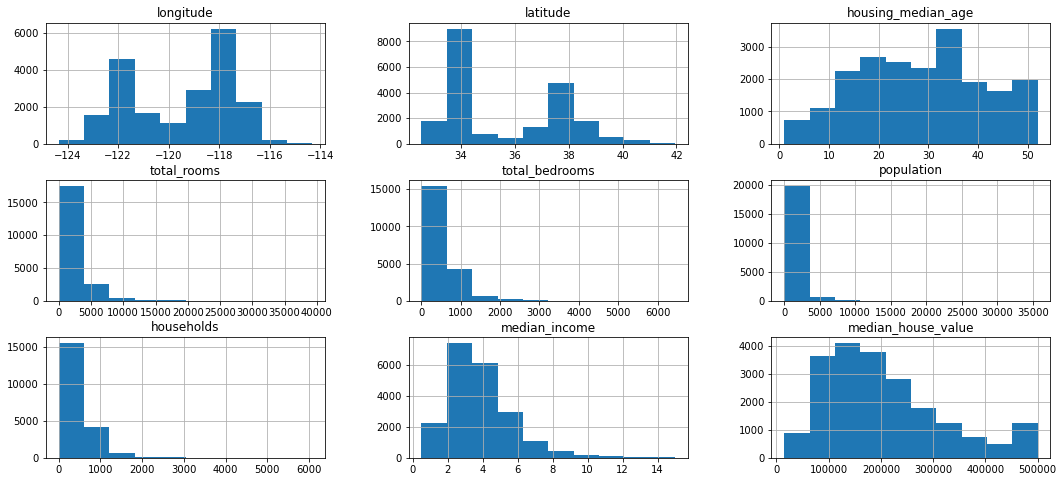

In [28]:
# see distribuiton of numeric variables
cal_housing.hist(figsize=(18,8))
plt.show()
# for the 5 models mentioned above, it doesn't matter if distribution of input variables are not normally distributed

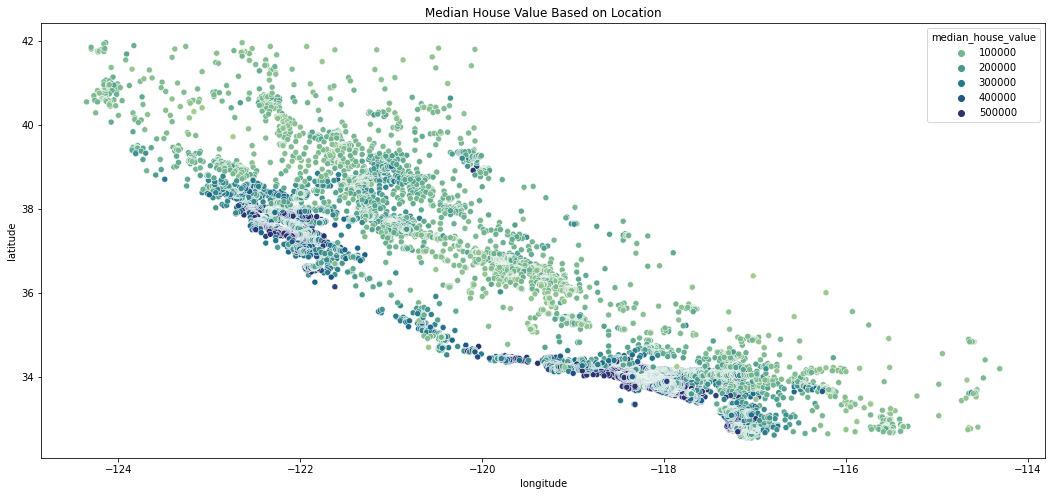

In [52]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=cal_housing, x='longitude', y='latitude', 
                hue='median_house_value', palette='crest')
plt.title('Median House Value Based on Location')
plt.show()

In [43]:
cal_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068416,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066126,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.321501,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930847,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.068416,-0.066126,-0.321501,0.930847,1.000000,0.877492,0.978765,-0.005590,0.051377
population,0.099773,-0.108785,-0.296244,0.857126,0.877492,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.978765,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.005590,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.051377,-0.024650,0.065843,0.688075,1.000000


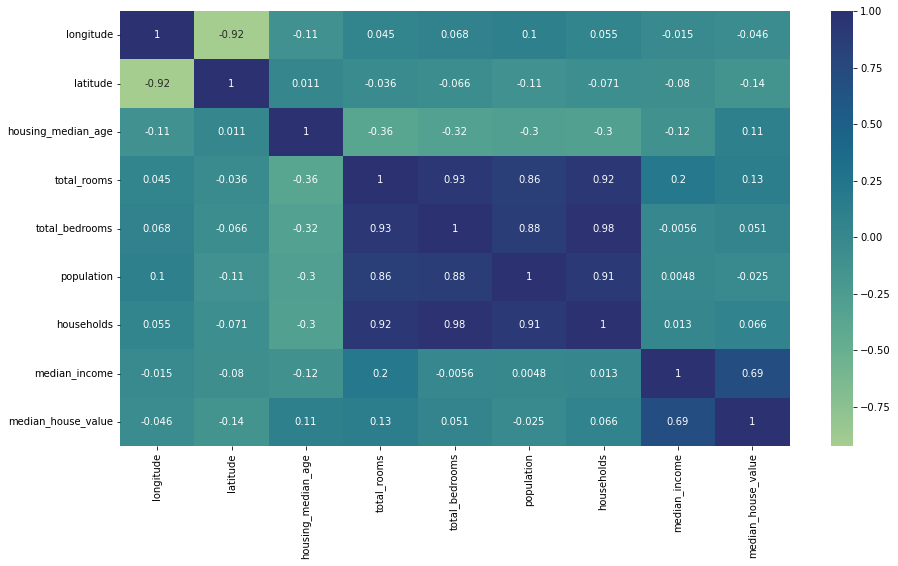

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(cal_housing.corr(), annot=True, cmap='crest')
plt.show()

In [53]:
# try some feature engineering to see if we can get better correlation values to median house value
## not feature engineering but convert proximity to numbers (one hot encode)
## ratio of rooms to bedroom
## ratio of population to household
## ratio of house age to total rooms
## ratio of households to total rooms
## might need to drop some after checking the corr values again